# Fake News Detection Assignment
**Objective**:

Develop machine learning models to accurately detect fake news. Utilize various algorithms including Decision Tree, Random Forest, XGBoost, ExtraTrees, and LightGBM.

**Dataset**:

[Fake News Dataset from Kaggle](https://www.kaggle.com/c/fake-news/data).

**Steps**:

* Data Loading: Load the dataset using Pandas.
* Preprocessing: Clean and preprocess the text data.
* Feature Extraction: Convert text to numerical data using TF-IDF.
* Data Splitting: Split the dataset into training and testing sets.
* Model Training: Train the models on the training set.
* Evaluation: Evaluate the models using accuracy on the test set.

## Step 1: Loading the Data


In [ ]:
import pandas as pd
!gdown --id 1y7e3ONz2fuClvSVdhYJIBUXgwdYacn9w
!unzip /content/FakeNews_train.csv.zip
# Load the dataset
data = pd.read_csv('/content/train.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1y7e3ONz2fuClvSVdhYJIBUXgwdYacn9w
To: /content/FakeNews_train.csv.zip
100% 38.8M/38.8M [00:00<00:00, 40.0MB/s]
Archive:  /content/FakeNews_train.csv.zip
  inflating: train.csv               


In [ ]:
data.shape

(20800, 5)

In [ ]:
data.sample(2)

,id,title,author,text,label
15332,15332,Angus King: Russian Hacking ’The Most Serious ...,Ian Hanchett,On Thursday’s broadcast of MSNBC’s “Morning Jo...,0
3633,3633,The Top Democrat In The Senate Just Accused FB...,Jason Easley,Here is the full text of Sen. Reid’s letter to...,1


In [ ]:
data.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

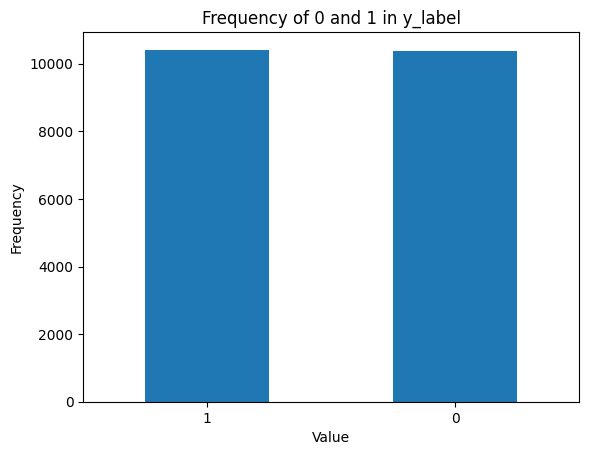

In [ ]:
import matplotlib.pyplot as plt
#label distribution
value_counts = data.label.value_counts()

# Plotting
value_counts.plot(kind='bar')
plt.title('Frequency of 0 and 1 in y_label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.show()

## Step 2: Text Preprocessing


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

# Function to clean the text
def clean_text(text):
  # keep only the letters
  text = re.sub('[^a-zA-Z]', ' ', str(text))
  # make the text lower then split it
  text = text.lower().split()
  # just uncomment the following line and think about what you are doing
  ps = PorterStemmer()
  text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
  text = ' '.join(text)
  return text

# Apply the cleaning function to your text data column
data['processed_text'] = data['text'].apply(clean_text)

In [ ]:
data['processed_text'].head()

0    hous dem aid even see comey letter jason chaff...
1    ever get feel life circl roundabout rather hea...
2    truth might get fire octob tension intellig an...
3    video civilian kill singl us airstrik identifi...
4    print iranian woman sentenc six year prison ir...
Name: processed_text, dtype: object

In [ ]:
data['text'].head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    Ever get the feeling your life circles the rou...
2    Why the Truth Might Get You Fired October 29, ...
3    Videos 15 Civilians Killed In Single US Airstr...
4    Print \nAn Iranian woman has been sentenced to...
Name: text, dtype: object

## Step 4: Splitting the Data


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=0)

## Step 3: Feature Extraction


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract features with 5000 features
tfidf = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)


#X = tfidf.fit_transform(data['processed_text']).toarray()

## Step 5: Model Training
### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_tfidf, y_train)

DecisionTreeClassifier()

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_tfidf, y_train)

RandomForestClassifier()

### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### ExtraTrees


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier()
et_classifier.fit(x_train_tfidf, y_train)

ExtraTreesClassifier()

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb_classifier = LGBMClassifier()
lgb_classifier.fit(x_train_tfidf, y_train)

[LightGBM] [Info] Number of positive: 8299, number of negative: 8341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.758143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666917
[LightGBM] [Info] Number of data points in the train set: 16640, number of used features: 4993
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498738 -> initscore=-0.005048
[LightGBM] [Info] Start training from score -0.005048


LGBMClassifier()

## Step 6: Evaluation


In [ ]:
from sklearn.metrics import accuracy_score

# Example for Random Forest
predictions = rf_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9353365384615384


## Step 7: Comparing Model Performance using ROC AUC Score


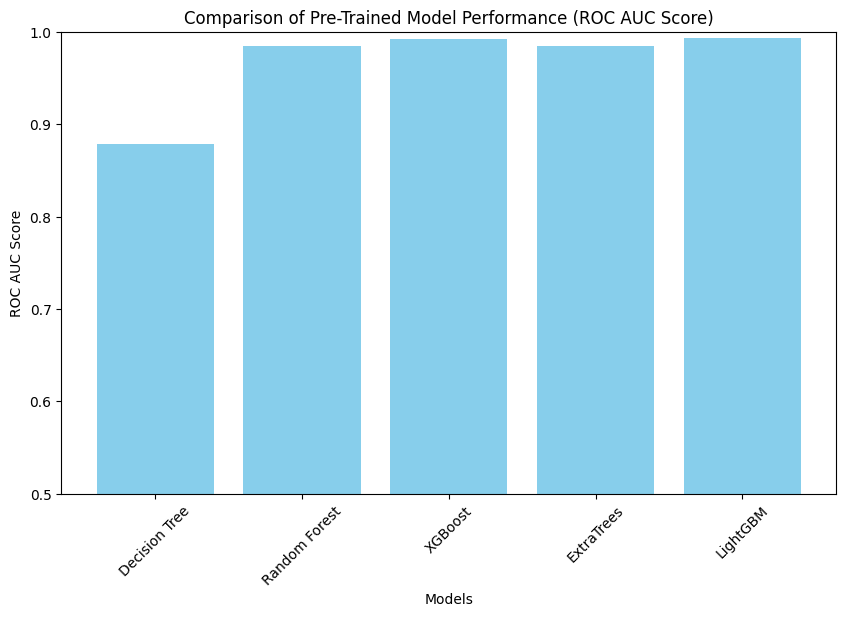

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Function to evaluate a pre-trained model and return its ROC AUC score
def evaluate_pretrained_model(model, x_test_tfidf, y_test):
    predictions = model.predict_proba(x_test_tfidf)[:, 1]
    roc_auc = roc_auc_score(y_test, predictions)
    return roc_auc

# Dictionary of your pre-trained models
pretrained_models = {
    "Decision Tree": dt_classifier,  # Replace with your pre-trained decision tree model variable
    "Random Forest": rf_classifier,  # Replace with your pre-trained random forest model variable
    "XGBoost": xgb_classifier,       # Replace with your pre-trained XGBoost model variable
    "ExtraTrees": et_classifier,     # Replace with your pre-trained ExtraTrees model variable
    "LightGBM": lgb_classifier       # Replace with your pre-trained LightGBM model variable
}

# Evaluate each pre-trained model and store results
roc_auc_scores = {name: evaluate_pretrained_model(model, x_test_tfidf, y_test) for name, model in pretrained_models.items()}

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color='skyblue')
# xlabel or xticks?
plt.xlabel('Models')
# ylabel or yticks?
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Pre-Trained Model Performance (ROC AUC Score)')
plt.ylim([0.5, 1.0])  # Adjust based on your ROC AUC score range
# xlabel or xticks?
plt.xticks(rotation=45)
# how show the diagram?
plt.show()